### Visualization of the extracted landmarks for every frame in a processed video for the BioVid Heat Pain Dataset

In [2]:
# Montowanie Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def visualize_mediapipe_landmarks_zoomed(sequence_data: np.ndarray, frame_indices: list):
    """
    Wizualizuje znormalizowane punkty orientacyjne MediaPipe (478 pkt, T, 1434)
    z dynamicznym skalowaniem osi, aby "przybliżyć" twarz. Oczekuje formatu X, Y, Z.
    """

    T, F = sequence_data.shape

    if F != 1434:
        print(f"BŁĄD: Oczekiwano {1434} cech (MediaPipe X, Y, Z), znaleziono {F}.")
        return

    frames_to_show = len(frame_indices)

    cols = min(frames_to_show, 5)
    rows = (frames_to_show + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

    # Flatten axes array for easy iteration if needed
    if rows * cols == 1:
        axes = np.array([axes])
    axes = axes.flatten()


    for idx, frame_index in enumerate(frame_indices):

        # Jeśli numer indeksu jest większy niż dostępna liczba subplotów, zakończ.
        if idx >= rows * cols:
            break

        if frame_index >= T:
            print(f"Ostrzeżenie: Klatka o indeksie {frame_index} nie istnieje (maksymalny indeks: {T-1}). Pominięto.")
            continue

        frame_vector = sequence_data[frame_index, :]

        # 1. PRAWIDŁOWE INDEKSOWANIE dla układu X, Y, Z (co 3 elementy)
        x_coords = frame_vector[0::3]
        y_coords = frame_vector[1::3]
        z_coords = frame_vector[2::3] # Z-współrzędna jest ignorowana w wizualizacji 2D

        # 2. DYNAMICZNE OBLICZANIE ZAKRESU WYŚWIETLANIA (ZOOM)
        X_MIN_data = x_coords.min()
        X_MAX_data = x_coords.max()
        Y_MIN_data = y_coords.min()
        Y_MAX_data = y_coords.max()

        # Dodanie bufora/marginesu
        BUFFER_FACTOR = 0.10 # 10% marginesu na krawędziach
        x_range = X_MAX_data - X_MIN_data
        y_range = Y_MAX_data - Y_MIN_data

        # Upewnienie się, że bufor nie jest zerowy
        if x_range == 0: x_range = 1e-6
        if y_range == 0: y_range = 1e-6

        X_MIN_plot = X_MIN_data - x_range * BUFFER_FACTOR
        X_MAX_plot = X_MAX_data + x_range * BUFFER_FACTOR
        Y_MIN_plot = Y_MIN_data - y_range * BUFFER_FACTOR
        Y_MAX_plot = Y_MAX_data + y_range * BUFFER_FACTOR

        ax = axes[idx]

        # 3. Rysowanie Markery dla poszczególnych punktów
        # UWAGA: Usunięto rysowanie linii zgodnie z prośbą
        ax.plot(x_coords, y_coords, 'o',
                markersize=2.5,
                color='red',
                alpha=0.9,
                zorder=2) # Rysowanie na wierzchu

        # Ustawienia Skalowania (DYNAMICZNE)
        ax.set_xlim(X_MIN_plot, X_MAX_plot)
        ax.set_ylim(Y_MAX_plot, Y_MIN_plot) # Oś Y odwrócona

        # Nazwa klatki
        ax.set_title(f"Klatka nr {frame_index + 1}\n")
        ax.set_aspect('equal', adjustable='box')
        ax.set_facecolor('#F8F8F8')
        ax.grid(True, linestyle='--', alpha=0.5)

    # Ukrycie nieużywanych subplotów
    for i in range(frames_to_show, rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


Kształt macierzy MediaPipe (klatki x cechy): (46, 1434)


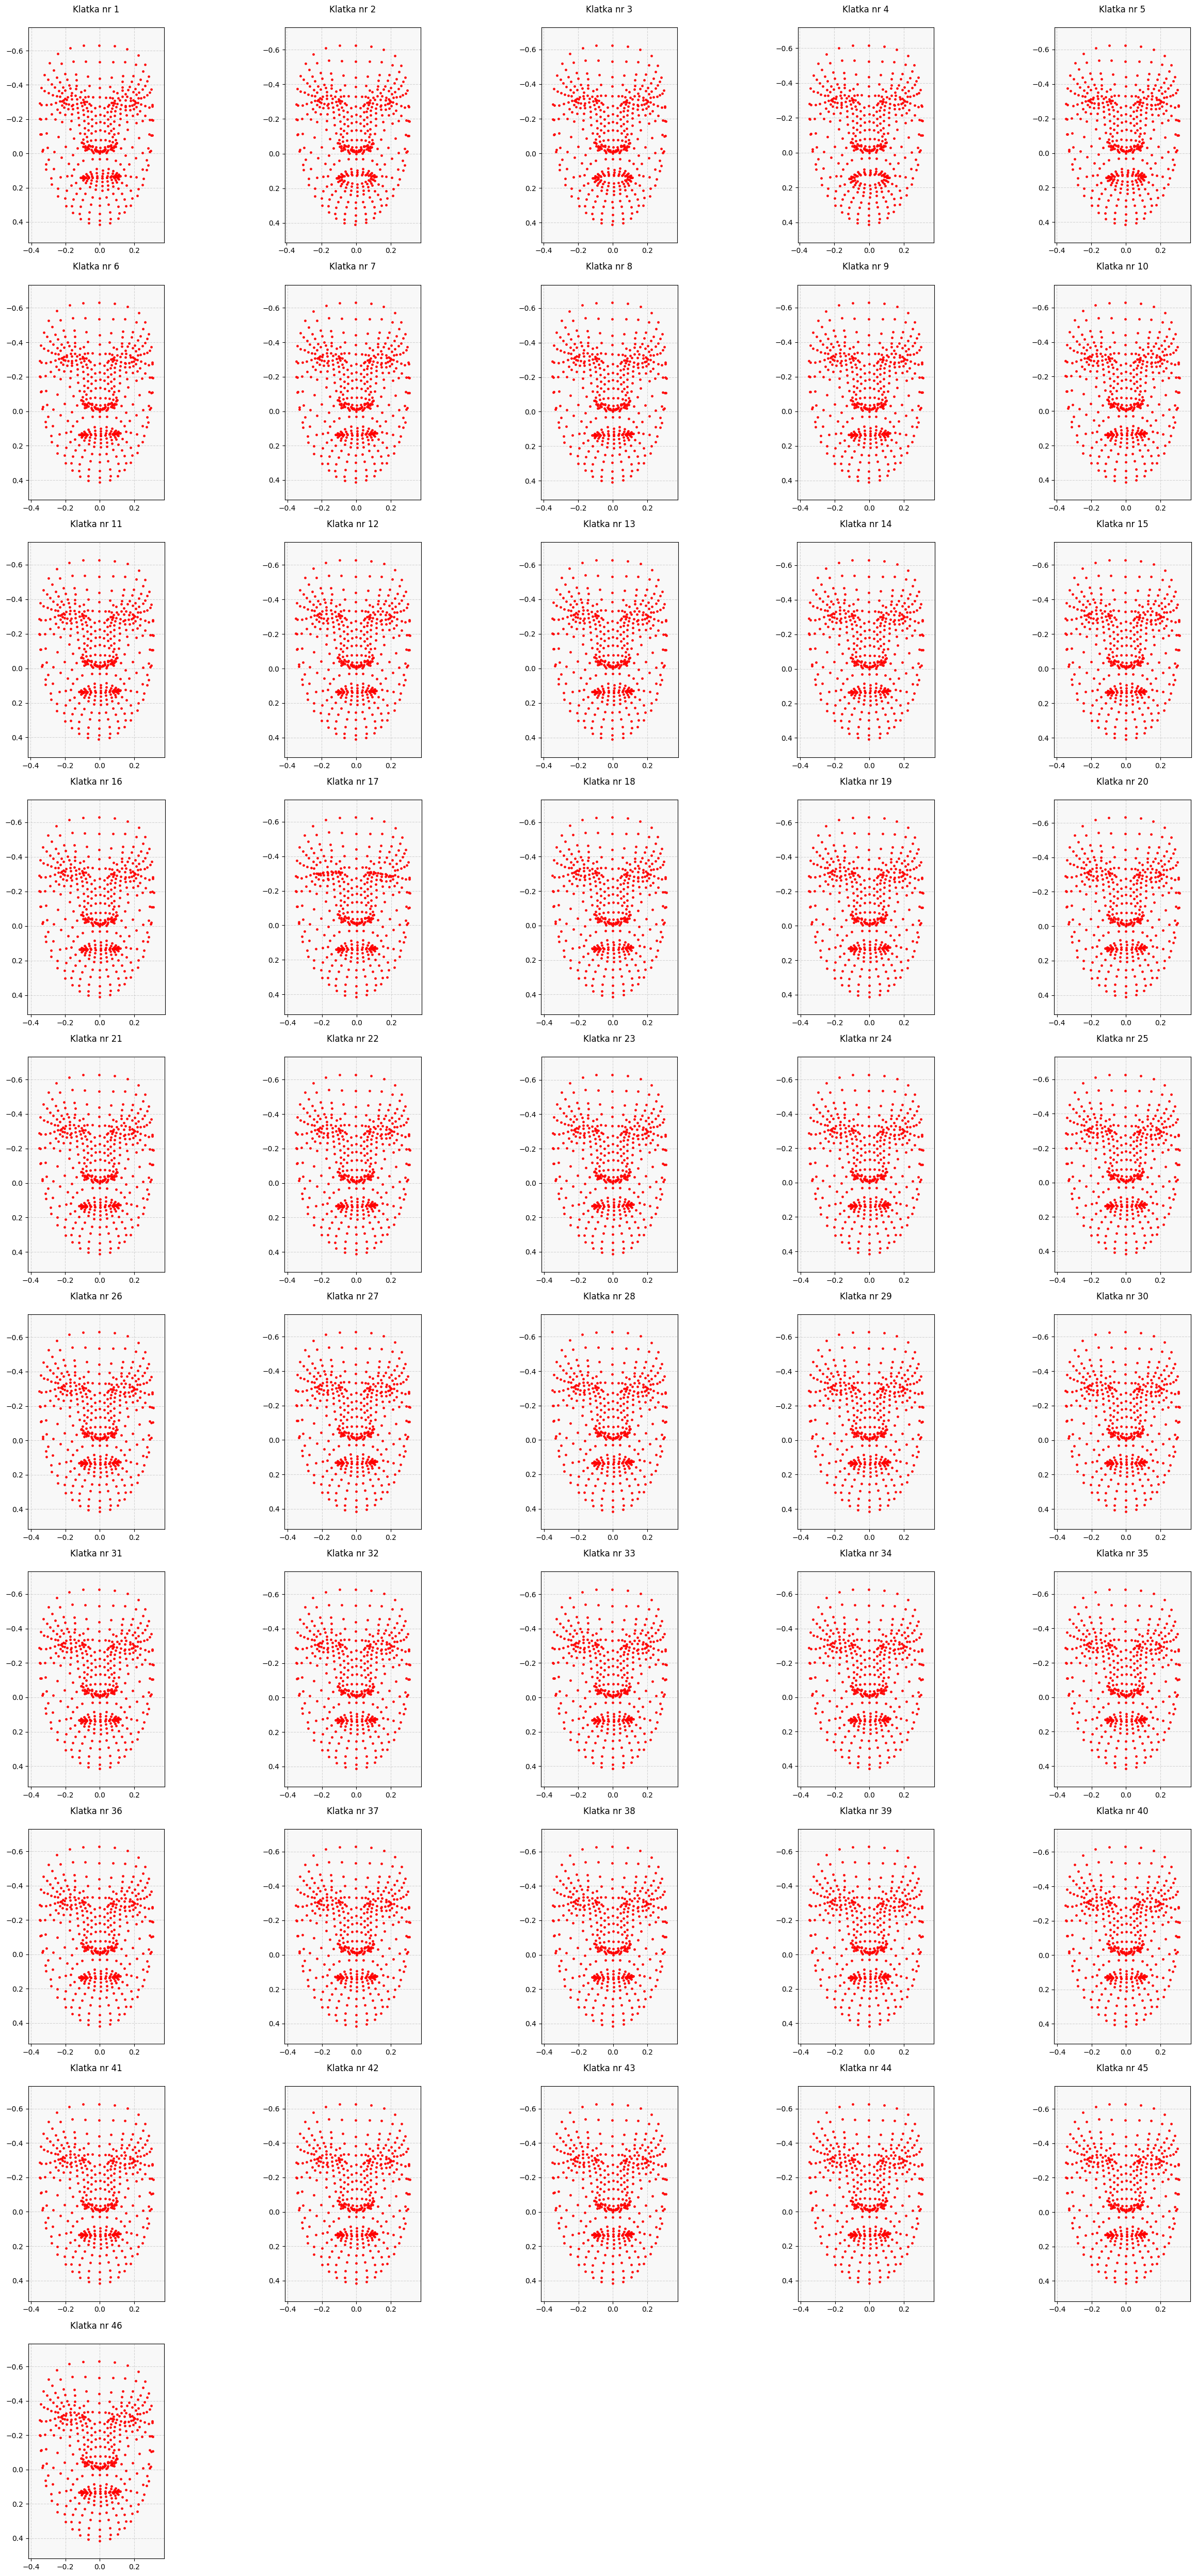

In [4]:
FRAMES_TO_VISUALIZE = [
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
    10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
    20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
    30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45
]

FILE_NAME_MP = 'train/071309_w_21-BL1-081.npy'
DRIVE_PREPROCESSED_ROOT = '/content/drive/MyDrive/PainRecognitionProject/data/BioVid_HeatPain_processed_478_xyz_frontalized/'
file_path_mp = os.path.join(DRIVE_PREPROCESSED_ROOT, FILE_NAME_MP)

try:
    sequence_data_mp = np.load(file_path_mp)
    print(f"Kształt macierzy MediaPipe (klatki x cechy): {sequence_data_mp.shape}")

    visualize_mediapipe_landmarks_zoomed(sequence_data_mp, FRAMES_TO_VISUALIZE)

except FileNotFoundError:
    print(f"BŁĄD: Plik .npy MediaPipe nie został znaleziony. Sprawdź, czy ścieżka: {file_path_mp} jest poprawna.")
except Exception as e:
    print(f"Wystąpił nieoczekiwany błąd podczas ładowania danych MediaPipe: {e}")